In [2]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 모델 선정 -> 학습 -> 평가 -> 피드백
# .... -> (재학습 or 모델변경 or 전처리) -> 배포


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. 데이터 수집 및 전처리 (모델에 학습할 데이터 준비)
# 예시 데이터 생성
data = {
    'Pclass': [3, 1, 3, 1],
    'Sex': [0, 1, 0, 1],   # male=0, female=1
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.28, 7.92, 53.10],
    'Survived': [0, 1, 1, 1]
}

df = pd.DataFrame(data)

iris_data = df[['Pclass', 'Sex', 'Age', 'Fare']]
iris_label = df['Survived']
# 기본 데이터를 학습 데이터와 테스트 데이터로 8:2 준비
# 학습/테스트 분리 X_train(featrue), y_train(label) / 테스트 데이터 x_test, y_test
x_train, x_test, y_train, y_test = train_test_split(
    iris_data, iris_label
    , train_size=0.8
    , shuffle=False
    ,stratify=iris_label
    ,random_state = 11
)


# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(x_train, y_train)

# 4. 예측 (준비해높은 테스트데이터 사용)
y_pred = model.predict(x_test)

# 5 vudrk
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(mse)
print(r2)

#시각화

#6. 결과



ValueError: Stratified train/test split is not implemented for shuffle=False

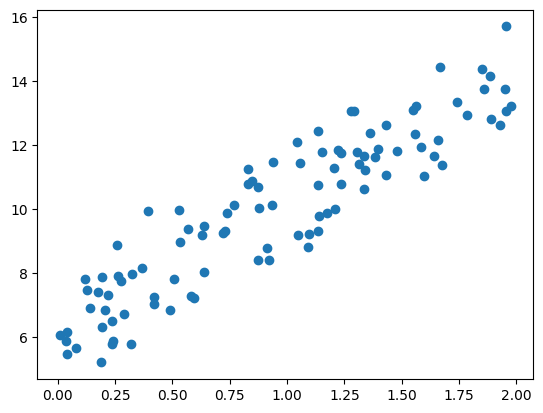

5.282113220734527


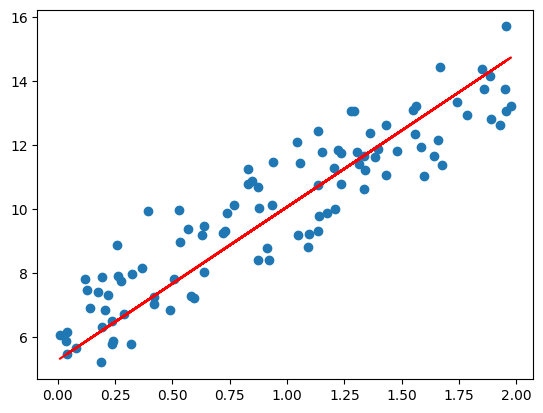

In [9]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1) # 잡음 random noise

# 데이터 시각화
plt.scatter(X, y)
plt.show()

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

# 가중치(w1,w0) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산

    w0_factors = np.ones((N, 1))    # W0 업데이트 하는 상수 1 배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff)) # w1 업데이트
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=150)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

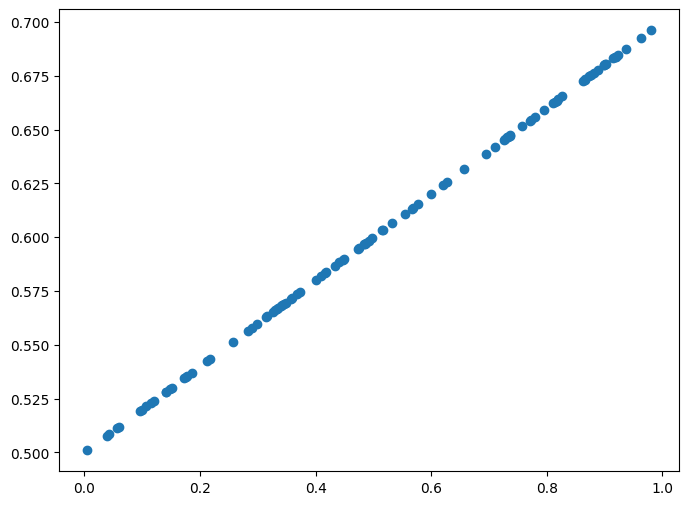

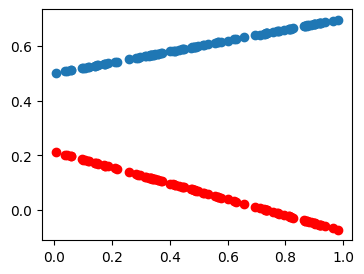

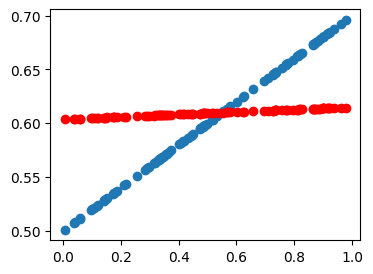

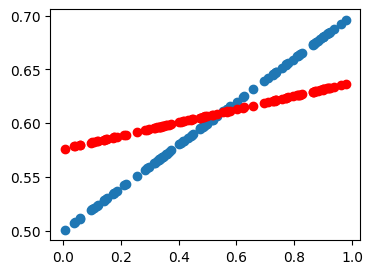

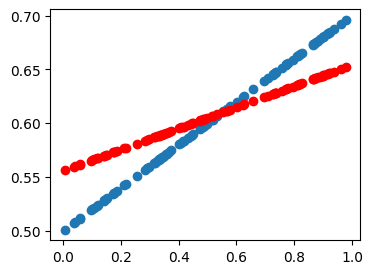

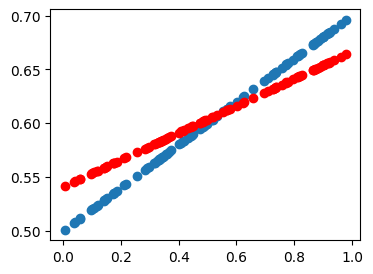

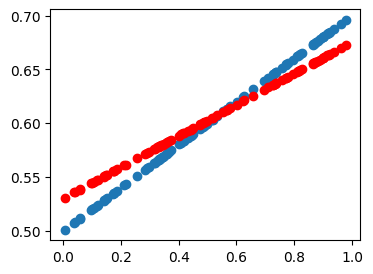

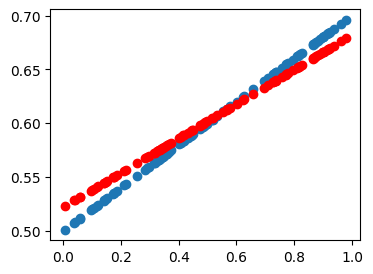

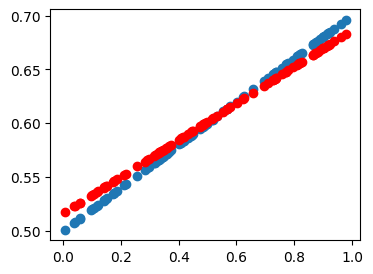

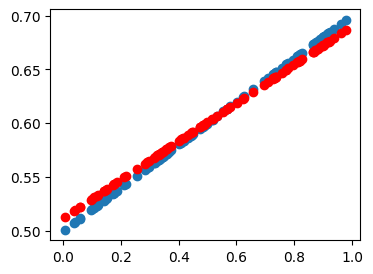

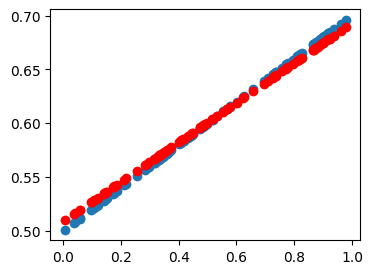

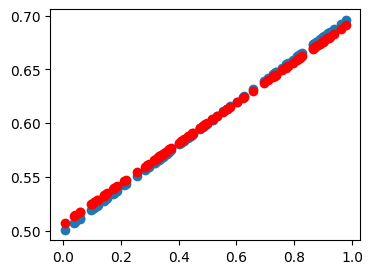

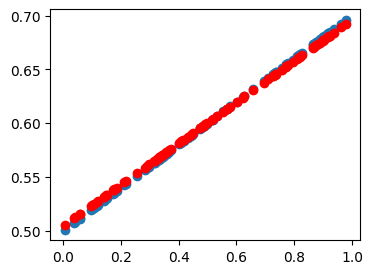

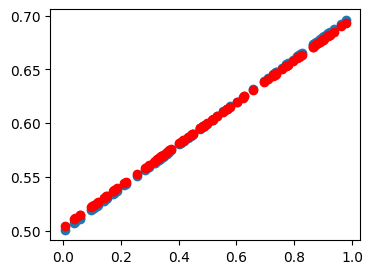

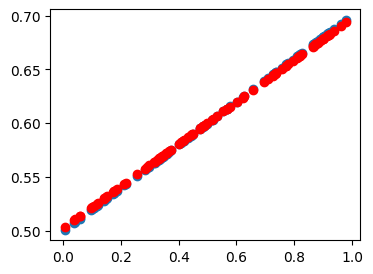

w : 0.19615918615281908
b : 0.5021088717005542


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.random.rand(100) # 0~1 데이터 백개 생성
y = 0.2 * x + 0.5       # 정답 Y (기울기 0.2, 절편 0.5인 직선)

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.show()

# 가중치와 편향 초기화
w = np.random.uniform(-1,1) # 가중치 w를 -1~1 사이 랜덤 값으로
b = np.random.uniform(-1,1) # 편향  b를 -1~1 사이 랜덤 값으로

# 예측 결과 시각화 함수

def plot_pred(pred,y):
    plt.figure(figsize=(4,3))
    plt.scatter(x,y)
    plt.scatter(x, pred,color='red')
    plt.show()
    
# 경사 하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred = w * x + b          # 현재 w, b로 예측값 계산
    
    error = np.abs(y_pred - y).mean() #예측값과 실제값의 평균 절대오차 (MAE)
    
    w_grad = lr * ((y_pred - y) * x).mean() # w에 대한 기울기 계산 후 학습률 곱하기
    b_grad = lr * (y_pred - y).mean() # w에 대한 기울기 계산 후 학습률 곱하기
    
    w -= w_grad # 가중치 w를 경사하강법으로 업데이트
    b -= b_grad # 편향 b를 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기 종료) = > 스케쥴러
    if error < 0.001:
        break
    if epoch % 10 == 0:         # 10번 에폭마다
        y_pred = w * x + b      # 최신 w,b로 다시 예측값 계산
        plot_pred(y_pred,y)     # 에측결과를 시각화
        
# 최종 학습된 가중치와 편향 확인
print('w :', w)
print('b :', b)


(5, 1)
기울기 (coefficient) : 2.0
절편 (intercept) : -0.20000000000000018
MSE : 0.15999999999999992
R2 : 0.9803921568627451


c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site

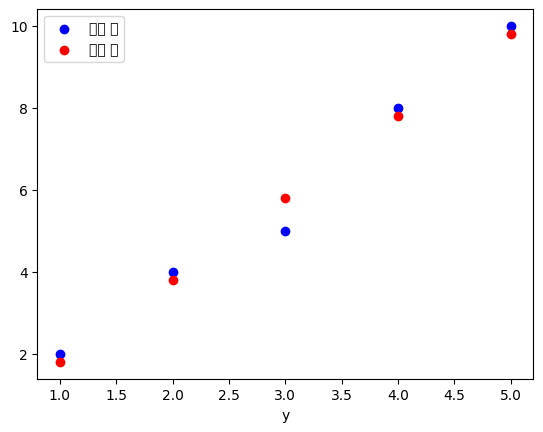

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 생성
X = np.array([[1],[2],[3],[4],[5]]) # 입력값 (2차원 형태)
y = np.array([2,4,5,8,10])
print(x.shape)
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

# 예측 값 계산
y_pred = model.predict(x)

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_[0]}") # 학습된 기울기 w 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE : {mse}")
print(f"R2 : {r2}")

plt.scatter(X,y, color='blue', label="실제 값")
plt.scatter(X,y_pred, color='red', label="예측 값")
plt.xlabel("X")
plt.xlabel("y")
plt.legend()
plt.show()


다중 선형 회귀

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 값 계산
y_pred = model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)  #  1/n*시그마(Y-Yhat)^2
print(f'회귀 계수(coefficient): {model.coef_}')
print(f'절편(intercept): {model.intercept_}')
print(f'MSE: {mse}')

회귀 계수(coefficient): [5.36082474 0.11237113]
절편(intercept): 259.4329896907218
MSE: 3.0927835051547214


<class 'sklearn.linear_model._base.LinearRegression'>


c:\python_workspace\python\machine_learning\ml_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python_workspace\python\machine_learning\ml_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python_workspace\python\machine_learning\ml_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python_workspace\python\machine_learning\ml_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python_workspace\python\machine_learning\ml_venv\Lib\site-packages\IPython\core\py

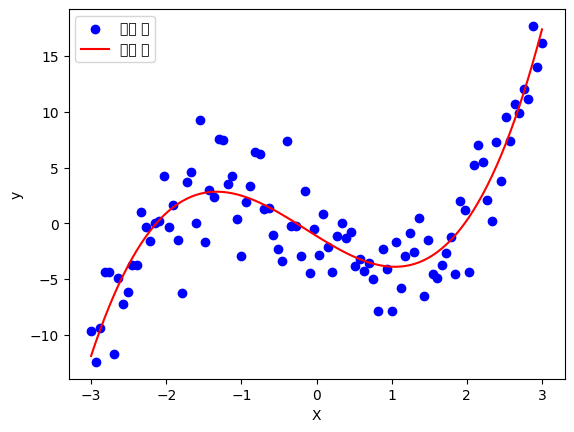

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0) # 랜덤 데이터 고정

X = np.linspace(-3, 3, 100)
X = X.reshape(-1, 1)
y = X**3 - 4*X + np.random.randn(100, 1) * 3

# 다항 특성 변환 (차수 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 선형 회귀 모델 학습
model = LinearRegression()

model.fit(X_poly, y)

# 예측 값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

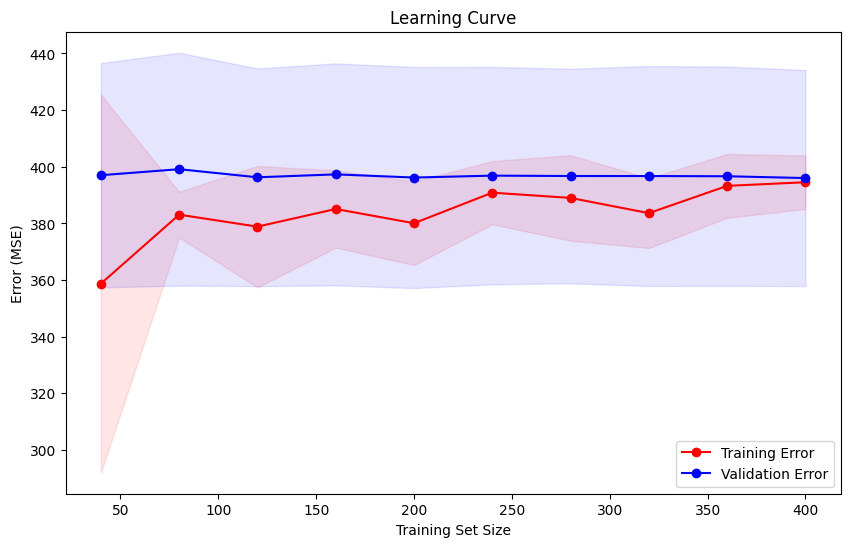

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# 데이터 생성
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = -val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error", color="red")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Error", color="blue")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="red")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="blue")

plt.xlabel("Training Set Size")
plt.ylabel("Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
# 유클리드 거리
import math


p = [1, 2]
q = [4, 6]

distance = math.dist(p, q)
print(distance)   # 출력: 5.0

5.0


In [ ]:
# 맨해튼 거리
p = [1, 2]
q = [4, 6]

manhattan = sum(abs(pi - qi) for pi, qi in zip(p, q))
print(manhattan)   # 출력: 7

[3, 4]
7


In [ ]:
# 코사인 유사도
import numpy as np

p = np.array([1, 2])
q = np.array([2, 3])

cos_sim = np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))
print(round(cos_sim, 3))   # 출력: 0.983

0.992


In [ ]:
# 마할라노비스 거리

import numpy as np
from scipy.spatial.distance import mahalanobis

# 샘플 데이터(공분산 계산용)
data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])

p = np.array([1, 2])
q = np.array([3, 4])
cov = np.cov(data.T)               # 공분산 행렬
inv_cov = np.linalg.inv(cov)       # 공분산 역행렬

dist = mahalanobis(p, q, inv_cov)
print(cov)
print(inv_cov)
print(round(dist, 3))  # 예: 1.414

[[1 2 3]
 [2 2 4]]
[[1.         1.        ]
 [1.         1.33333333]]
[[ 4. -3.]
 [-3.  3.]]
2.0


In [ ]:
import numpy as np

theta = np.array([0.5, 1.0])   # 가중치
x = np.array([1, 2])           # 입력 데이터

z = theta @ x                  # 선형 조합 (θ^T x)
sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

print(round(sigmoid, 3))  # 예: 0.953

0.924


In [ ]:
import numpy as np

# 간단한 데이터 (x: 특성, y: 레이블)
x = np.array([0.2, 0.8, 1.5])
y = np.array([0, 1, 1])

theta = 1.0                            # 임의 가중치
z = theta * x
h = 1 / (1 + np.exp(-z))               # 시그모이드

# Log Loss 계산
log_loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
print(round(log_loss, 3))              # 예: 0.391

# 예측 (threshold=0.5)  
pred = (h >= 0.5).astype(int)
print(h)
print(pred)                             # 예: [0 1 1]

-0.876
[0.549834   0.68997448 0.81757448]
[1 1 1]


In [ ]:
import numpy as np

# 클래스 3개에 대한 점수(θᵀx 값)
scores = np.array([2.0, 1.0, 0.1])

# 소프트맥스 함수
exp_scores = np.exp(scores)
softmax = exp_scores / np.sum(exp_scores)

print(np.round(softmax, 3))   # 예: [0.659 0.242 0.099]

[0.659 0.242 0.099]


In [ ]:
import numpy as np

# 입력 벡터
x = np.array([1.2, 0.5])

# 각 레이블별 가중치 (3개의 레이블: 액션, 코미디, 드라마)
theta = np.array([
    [1.0, -0.5],   # 액션
    [-0.3, 1.2],   # 코미디
    [0.8, 0.8]     # 드라마
])

# 레이블별 선형 조합 + 시그모이드
z = theta @ x
sigmoid = 1 / (1 + np.exp(-z))

print(np.round(sigmoid, 3))   # 예: [0.777 0.622 0.845]

[0.721 0.56  0.796]


In [ ]:
import numpy as np

x = np.array([1.0, 0.5])   # 입력 특징

# 출력 1: 질병 유무 (이진 분류 → 시그모이드)
theta_disease = np.array([1.2, -0.8])
z1 = theta_disease @ x
disease_prob = 1 / (1 + np.exp(-z1))

# 출력 2: 중증도 (4개 클래스 → 소프트맥스)
theta_severity = np.array([
    [0.5, 1.0],
    [1.0, -0.2],
    [-0.5, 0.7],
    [0.2, 0.1]
])
z2 = theta_severity @ x
exp_scores = np.exp(z2)
severity_prob = exp_scores / np.sum(exp_scores)

print("질병 확률:", round(disease_prob, 3))
print("중증도 확률:", np.round(severity_prob, 3))

질병 확률: 0.69
중증도 확률: [0.371 0.336 0.118 0.175]


In [ ]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([1, 1, 0, 1, 0])

# Confusion Matrix 요소 계산
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}")

TP=2, FP=1, FN=1, TN=1


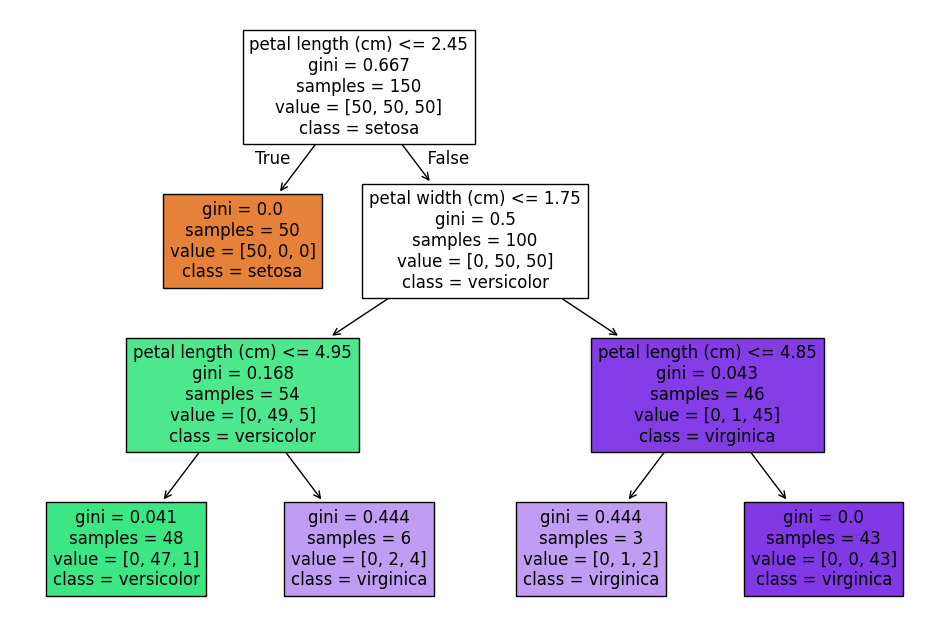

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 로드 및 모델 학습
iris = load_iris()
X, y = iris.data, iris.target
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
from collections import Counter

# 어떤 리프 노드에 도달한 샘플들의 실제 클래스
leaf_samples = ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A']

counts = Counter(leaf_samples)
total = len(leaf_samples)

probs = {cls: cnt / total for cls, cnt in counts.items()}
print(probs)   # 예: {'A': 0.8, 'B': 0.2}

{'A': 0.8, 'B': 0.2}


In [ ]:
from IPython.display import display, Math

print("CART 분할 기준")
display(Math(r"G = 1 - \sum_{i=1}^{k} p_i^2"))

CART 분할 기준


<IPython.core.display.Math object>

In [ ]:
from collections import Counter

# 한 노드에 있는 샘플들의 클래스
node = ['A', 'A', 'B', 'A', 'B', 'A']

counts = Counter(node)
total = len(node)

gini = 1 - sum((cnt/total)**2 for cnt in counts.values())
print(round(gini, 3))   # 예: 0.444

0.444


In [ ]:
from IPython.display import display, Math
print("엔트로피 공식")
display(Math(r"H(D) = -\sum_{i=1}^k p_i \log_2(p_i)"))



엔트로피 공식


<IPython.core.display.Math object>

In [ ]:
import math
from collections import Counter

# 한 노드에 있는 샘플의 클래스 구성
node = ['A', 'A', 'B', 'A', 'B', 'A']

counts = Counter(node)
total = len(node)

entropy = -sum((cnt/total) * math.log2(cnt/total) for cnt in counts.values())
print(round(entropy, 3))   # 예: 0.918

0.918


## 정보이득 공식
$$
IG(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)
$$

In [ ]:
import math
from collections import Counter

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((c/total) * math.log2(c/total) for c in counts.values())

# 전체 데이터의 클래스
D = ['A', 'A', 'B', 'A', 'B', 'A']   # 엔트로피 계산
H_D = entropy(D)

# 속성 A로 분할한 경우
Dv1 = ['A', 'A', 'A']   # 예: feature A = 0 그룹
Dv2 = ['B', 'A', 'B']   # 예: feature A = 1 그룹

H_split = (len(Dv1)/len(D)) * entropy(Dv1) + \
          (len(Dv2)/len(D)) * entropy(Dv2)

IG = H_D - H_split

print("정보 이득:", round(IG, 3))

정보 이득: 0.459


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 규제 없음 (과적합 가능)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print("규제 없음 정확도:", model1.score(X_test, y_test))

# 최대 깊이 제한
model2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model2.fit(X_train, y_train)
print("max_depth=2 정확도:", model2.score(X_test, y_test))

규제 없음 정확도: 1.0
max_depth=2 정확도: 0.9777777777777777


## 결정 트리 회귀 예측 값 (걍 평균아님?) > 그 잎(leaf)에 들어온 데이터들의 평균
$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# 회귀용 california housing 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 규제 없는 회귀 트리
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 첫 번째 테스트 샘플 예측
pred = model.predict([X_test[0]])
print("예측값:", np.round(pred[0], 3))

예측값: 0.414


가지치기 없음: 1.0
max_depth=2 가지치기: 0.9777777777777777


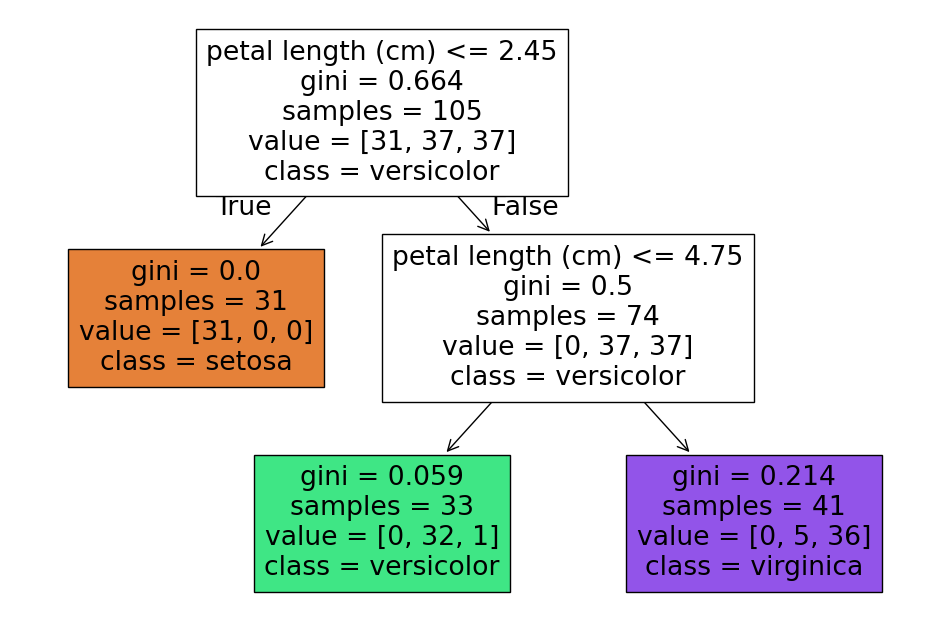

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 가지치기 없음 (과적합 가능)
model_full = DecisionTreeClassifier(random_state=42)
model_full.fit(X_train, y_train)
print("가지치기 없음:", model_full.score(X_test, y_test))

# 사전 가지치기: 트리 깊이 제한
model_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)
model_pruned.fit(X_train, y_train)
print("max_depth=2 가지치기:", model_pruned.score(X_test, y_test))

# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(
    model_pruned,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)
plt.show()


## 최적의 초평면
$$
\text{maximize } \frac{2}{\|\mathbf{w}\|}
$$

## 제약 조건
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

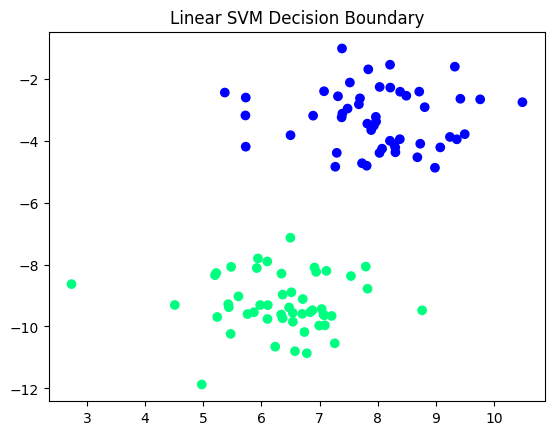

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# 선형 SVM 모델 학습
model = SVC(kernel='linear')
model.fit(X, y)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Linear SVM Decision Boundary")
plt.show()

## 커널트릭 다항커널
$$
K(x, x') = (\mathbf{x} \cdot \mathbf{x'} + c)^d
$$
## RBF 커널
$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

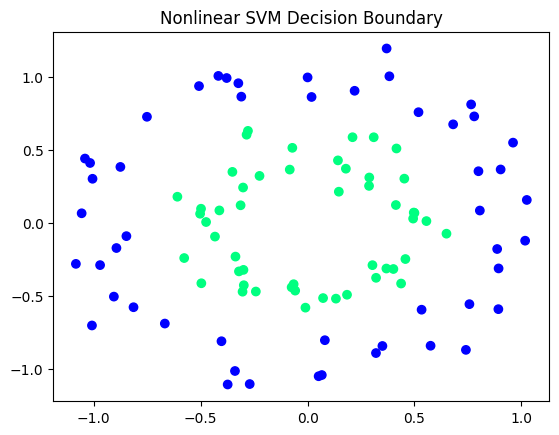

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_circles(
    n_samples=100       # 데이터 100개
    , factor=0.5        # 바깥 원의 반지름 대비 안쪽 원의 반지름
    , noise=0.1         # 데이터 섞이는 노이즈
)

# 비선형 SVM 모델 학습 (RBF 커널)
model = SVC(
    kernel='rbf'                # RBF(가우시안) 커널 -> 비선형 분류
    , gamma=1                   # 결정 경계의 굴곡
    )
model.fit(X, y) 

# 시각화
plt.scatter(
    X[:, 0]
    , X[:, 1]
    , c=y
    , cmap='winter'
)
plt.title("Nonlinear SVM Decision Boundary")
plt.show()

## SVM회귀(SVR) 최적화
$$
\min \frac{1}{2} \|\mathbf{w}\|^2
$$

## 제약조건
$$
|y_i - (\mathbf{w} \cdot \mathbf{x}_i + b)| \leq \epsilon
$$


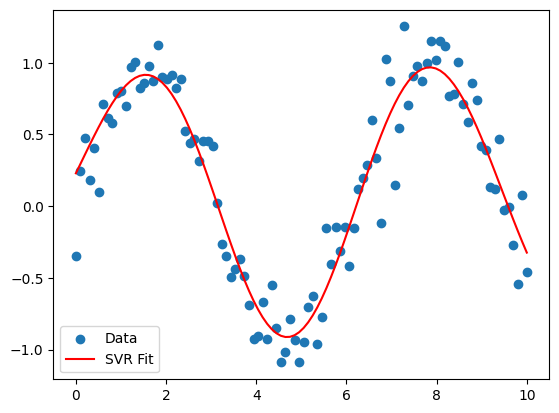

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# SVM 회귀 모델 학습
model = SVR(
    kernel='rbf'                # 비선형 회귀를 위한 RBF 커널
    , C=1                       # 오차에 대한 패널티 강도 (크면 경계가 구불구불 -> 과적합 가능성 / 작으면 경계가 부드러워 짐) 0 < c < 무한(하이퍼파라미터 최적화로 찾는다.)
    , epsilon=0.1               # 오차 허용 구간 (크면 더 많은 데이터를 허용범위(튜브)안에 넣어서 단순한 모델을 만듦)
)
model.fit(X, y)

# 예측 및 시각화
y_pred = model.predict(X)
plt.scatter(X, y, label="Data")                             # 실제 데이터
plt.plot(X, y_pred, color='red', label="SVR Fit")           #
plt.legend()
plt.show()

SVR 쓰기 좋은 상황
- 데이터에 약간의 노이즈가 있는경우
- 복잡한 곡선 형태의 관계
- 선형회귀 못쓸때

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 준비
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 개별 모델
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)

# 투표 기반 분류기
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svc_clf)],
    voting='soft'  # soft 또는 hard
)
voting_clf.fit(X_train, y_train)

print("Accuracy:", voting_clf.score(X_test, y_test))

Accuracy: 1.0


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 베깅 분류기
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,  # 모델 개수
    max_samples=0.8,   # 샘플 크기
    bootstrap=True,    # 복원 추출 여부 (True: 베깅, False: 페이스팅)
    random_state=42
)
bagging_clf.fit(X_train, y_train)
print("Bagging Accuracy:", bagging_clf.score(X_test, y_test))

Bagging Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb_clf.score(X_test, y_test))

Gradient Boosting Accuracy: 1.0


In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ],
    final_estimator=LogisticRegression(),  # 메타 모델ㅂㅁ
    cv=5  # 교차 검증
)
stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stacking_clf.score(X_test, y_test))

Stacking Accuracy: 1.0


### Decision Tree 를 단일로 사용한다 -> 일반화 성능이 낮음

### 앙상블 -> 분산을 억제한다 (과적합 위험을 낮춘다) 일반화 성능 상승

### 배깅 -> 병렬로 모델을 학습 시키고 결과를 다수결 또는 평균으로 내보낸다. (랜덤포레스트)

### 부스팅 -> 순차구조 병렬을 직렬로 학습시키고,결과를 마지막에 내보낸다(점진적으로 성능 향상)  (부스팅계열)

### 스태킹 -> 병렬로 모델을 학습시키고 결과를 하나의 메타모델이 판단한다

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
X = iris.data

# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(X)
print("원본 데이터 형태:", X.shape)
print("축소된 데이터 형태:", X_reduced.shape)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24360\456562808.py:28: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_24360\456562808.py:28: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_24360\456562808.py:28: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_24360\456562808.py:28: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Li

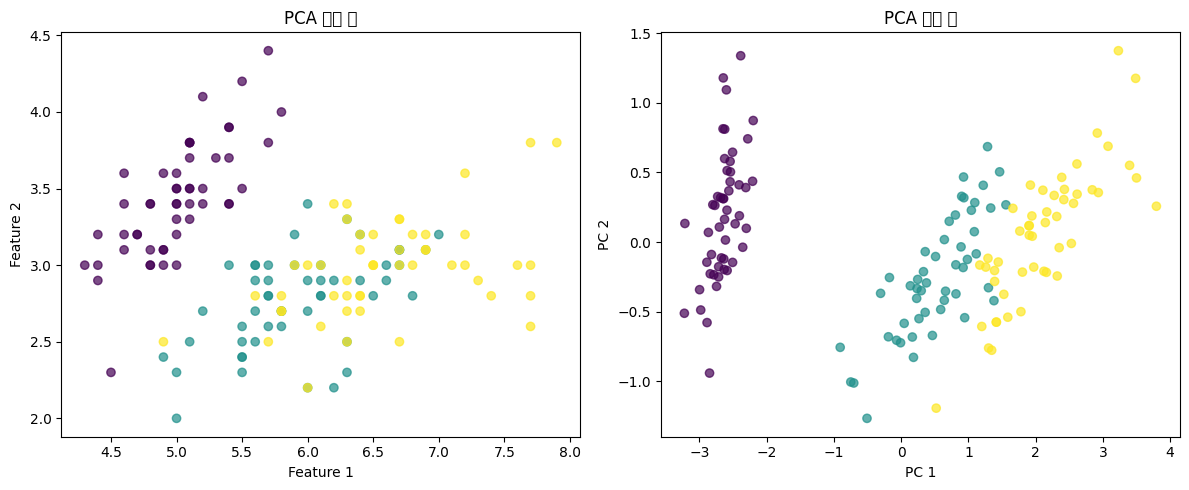

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y=iris.target
plt.figure(figsize=(12,5))

# PCA 적용 전
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("PCA 적용 전")

# PCA 적용 (4차원 → 2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# pca 적용 후
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("PCA 적용 후")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.decomposition import KernelPCA

# 커널 PCA 적용 (RBF 커널 사용)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

print("커널 PCA로 축소된 데이터 형태:", X_kpca.shape)

커널 PCA로 축소된 데이터 형태: (100, 2)


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE 적용
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10) # 차원 축소 후 수 , # 선형관계를 유지할 이웃 수
X_lle = lle.fit_transform(X)

print("LLE로 축소된 데이터 형태:", X_lle.shape)
print()

LLE로 축소된 데이터 형태: (150, 2)



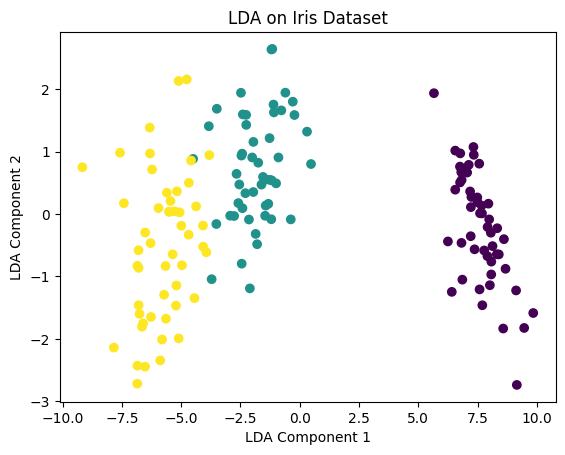

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# LDA 적용 (2차원으로 차원 축소)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)                 # 지도학습 방식 (PCA는 비지도학습 방식)

# LDA 결과 시각화
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA on Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()


- 차원 축소
    - 여러 특성을 더 적은 차원 (예: 2차원, 3차원, ..)으로 줄이기
    - 512 * 512 = 25000~ => 50~100개정도 차원 (손실이 생각보다 많이 없다.)
    - 시각화할때만 2차원으로 차원축소 -> 시각화

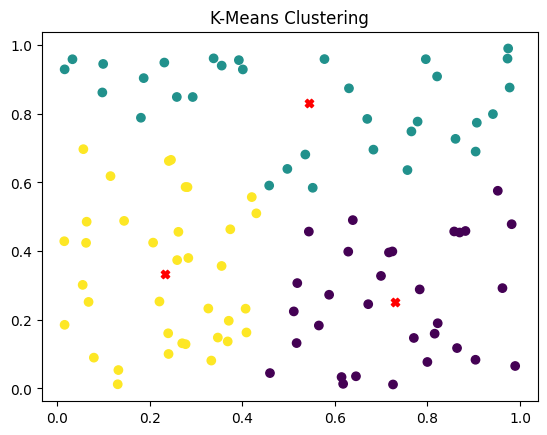

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100, 2)      # 100개의 2차원 데이터

# K-평균 군집 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)          # 클러스터 수는 3개
kmeans.fit(X)

# 예측 및 시각화
labels = kmeans.predict(X)          # 새로운 데이터의 군집까지 자동으로 할당한다.
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X')      # n클러스터 3개이므로 중심점 3개의 X좌표, n클러스터 3개이므로 중심점 3개의 y좌표, 색상은 검정색, 마커는 x
plt.title("K-Means Clustering")
plt.show()


### 가우시안 혼합 모델 혼합분포 
$$
p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$


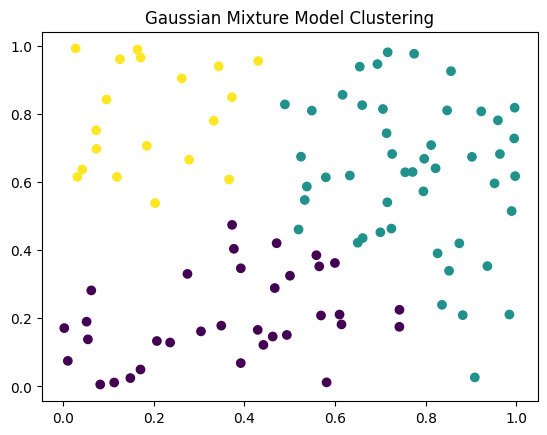

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100, 2)

# GMM 모델 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# 예측 및 시각화
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# 예시 데이터 생성
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)  # 전체 데이터 갯수,실제 클러스터 갯수 , 클러스터 퍼짐 정도(크면넓게 퍼져있고, 작으면 오미조밀)

# K-평균 군집화 모델 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 실루엣 계수 계산
silhouette_avg = silhouette_score(X, kmeans.labels_)        # 각 데이터가 어떤 클래스에 속하는지 결과
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.71


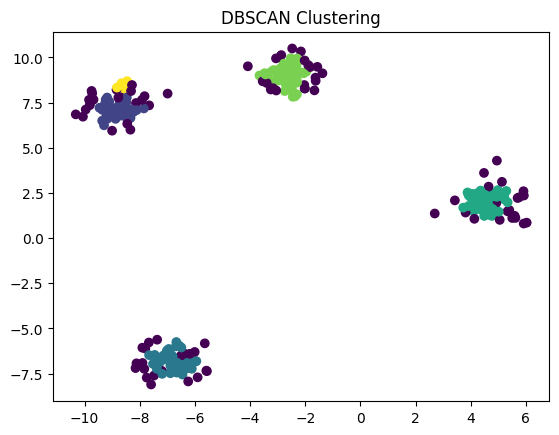

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 예시 데이터 생성
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# DBSCAN 군집화 모델 학습
dbscan = DBSCAN(
    eps=0.3             # 한점 주변을 이웃으로 판단할 변경 (거리)
                        # 너무 크면 모든점이 하나로 묶임. 너무작으면 여러개를 과하게 쪼개거나 대부분의 데이터가 노이즈가 된다.
    , min_samples=5     # 하나의 군집을 형성하기위한 최소 이웃 데이터 갯수
) 
y_dbscan = dbscan.fit_predict(X)

# fit() : 밀도 기반으로 군집 구조 학습
# predict() : 각 데이터의 군집 번호 반환
y_dbscan = dbscan.fit_predict(X)    # 두 가지 과정을 동시에 수행

# 군집 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()